#  Housing Price Prediction using Support Vector Machine

This notebook demonstrates how to use Support Vector Regression (SVR) to predict housing prices and analyze the results through binary classification.

## Project Overview
- **Dataset**: California Housing Dataset
- **Model**: Support Vector Regressor with Linear Kernel
- **Analysis**: Regression + Binary Classification
- **Visualization**: Confusion Matrix, Performance Metrics, Data Distribution


##  Step 1: Import Required Packages


In [1]:
# Import the required packages
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn import datasets
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print(" All packages imported successfully!")


 All packages imported successfully!


##  Step 2: Load and Explore the Dataset


In [2]:
# Load the housing dataset and shuffle the data
print("📊 Loading California Housing Dataset...")
data = datasets.fetch_california_housing()
X, y = shuffle(data.data, data.target, random_state=7)

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['Price'] = y

print(f"Dataset Shape: {df.shape}")
print(f"Features: {list(data.feature_names)}")
print(f"Price Range: ${y.min():.2f} - ${y.max():.2f} (hundreds of thousands)")

# Display first few rows
df.head()


 Loading California Housing Dataset...
Dataset Shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Price Range: $0.15 - $5.00 (hundreds of thousands)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,2.0278,31.0,2.846928,1.091641,3107.0,3.128902,34.06,-118.31,3.60000
1,4.3056,30.0,5.036932,1.011364,905.0,2.571023,33.81,-118.31,3.36000
2,3.6750,52.0,4.851351,0.969112,1048.0,2.023166,37.81,-122.24,2.69900
3,2.6392,26.0,3.832265,1.104701,1821.0,1.945513,37.78,-122.43,2.87500
4,9.1974,23.0,8.075949,0.965190,916.0,2.898734,37.21,-121.86,5.00001


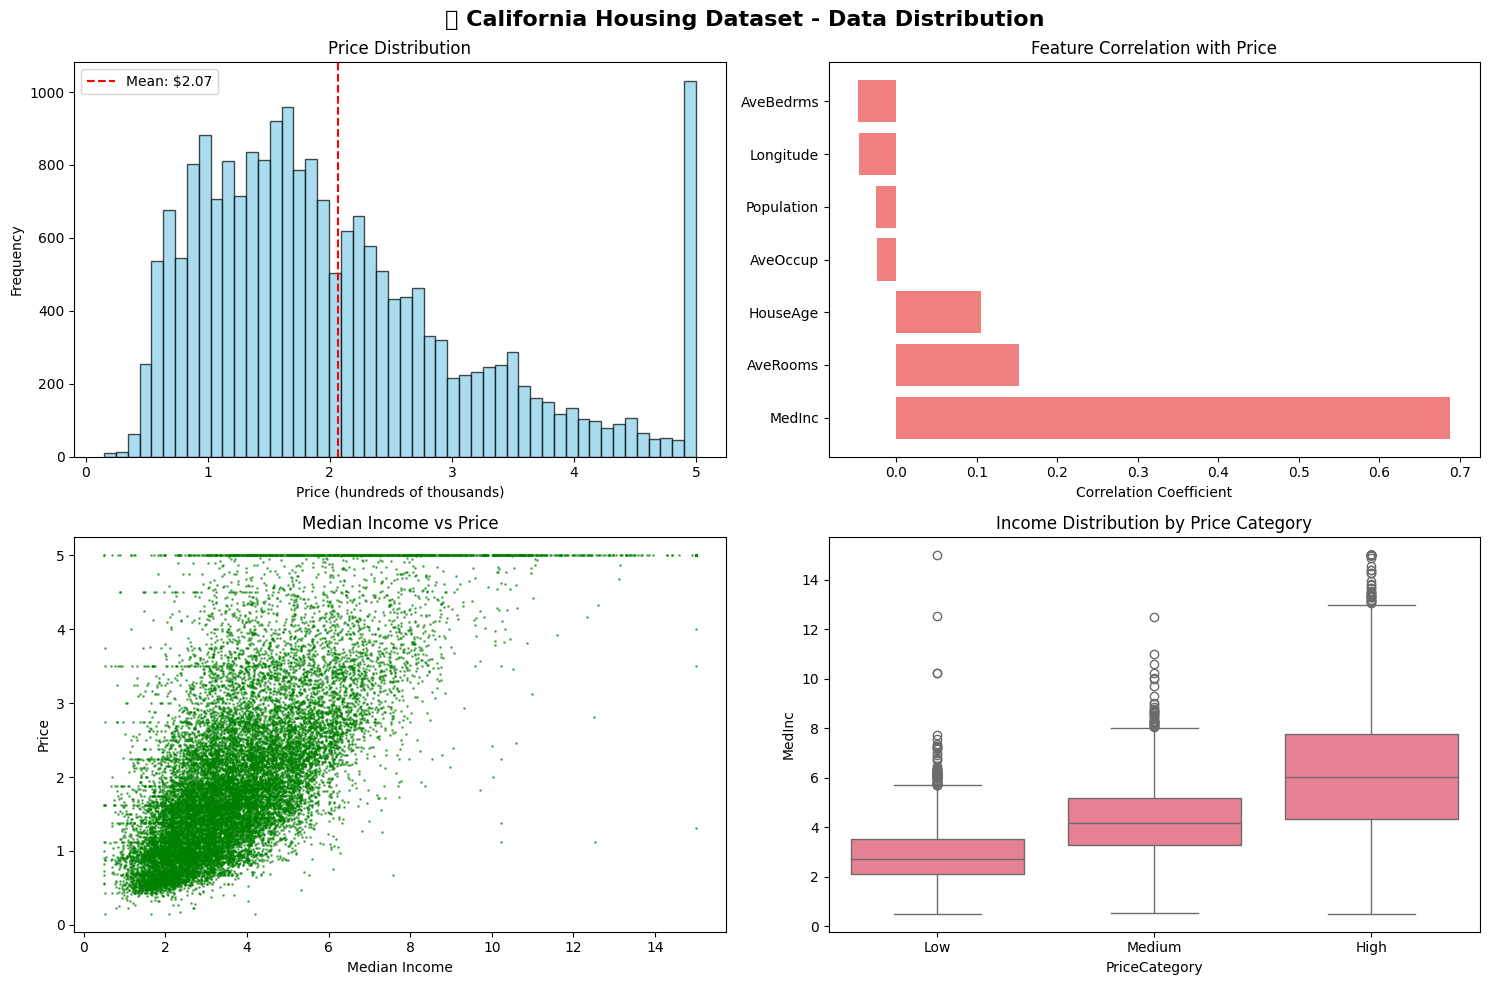

In [3]:
# Visualize data distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📈 California Housing Dataset - Data Distribution', fontsize=16, fontweight='bold')

# Price distribution
axes[0,0].hist(y, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price (hundreds of thousands)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(y.mean(), color='red', linestyle='--', label=f'Mean: ${y.mean():.2f}')
axes[0,0].legend()

# Feature correlation with price
correlations = df.corr()['Price'].sort_values(ascending=False)[1:-1]
axes[0,1].barh(range(len(correlations)), correlations.values, color='lightcoral')
axes[0,1].set_yticks(range(len(correlations)))
axes[0,1].set_yticklabels(correlations.index)
axes[0,1].set_title('Feature Correlation with Price')
axes[0,1].set_xlabel('Correlation Coefficient')

# Scatter plot: MedInc vs Price
axes[1,0].scatter(df['MedInc'], df['Price'], alpha=0.5, color='green', s=1)
axes[1,0].set_title('Median Income vs Price')
axes[1,0].set_xlabel('Median Income')
axes[1,0].set_ylabel('Price')

# Box plot for different price ranges
price_categories = pd.cut(df['Price'], bins=3, labels=['Low', 'Medium', 'High'])
df_temp = df.copy()
df_temp['PriceCategory'] = price_categories
sns.boxplot(data=df_temp, x='PriceCategory', y='MedInc', ax=axes[1,1])
axes[1,1].set_title('Income Distribution by Price Category')

plt.tight_layout()
plt.show()


##  Step 3: Split Dataset (80/20 Train/Test)


 Splitting dataset into 80% training and 20% testing...
Training set: 16512 samples
Testing set: 4128 samples


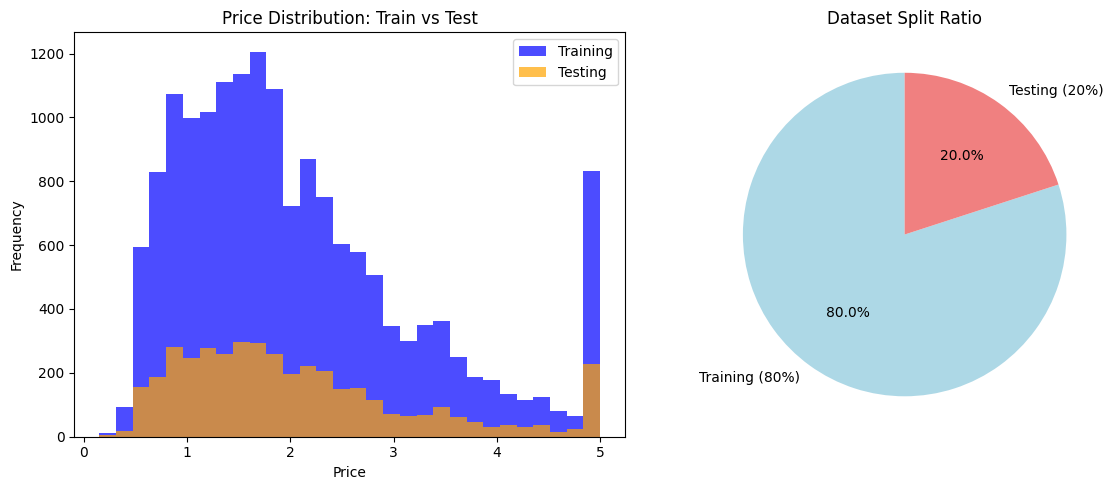

In [4]:
# Split the dataset into training and testing in an 80/20 format
print(" Splitting dataset into 80% training and 20% testing...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Visualize the split
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(y_train, bins=30, alpha=0.7, label='Training', color='blue')
ax1.hist(y_test, bins=30, alpha=0.7, label='Testing', color='orange')
ax1.set_title('Price Distribution: Train vs Test')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.legend()

# Pie chart for split ratio
sizes = [len(y_train), len(y_test)]
labels = ['Training (80%)', 'Testing (20%)']
colors = ['lightblue', 'lightcoral']
ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Dataset Split Ratio')

plt.tight_layout()
plt.show()


## 🤖 Step 4: Train SVM Model & Make Predictions


 Preprocessing data with StandardScaler...
 Training Support Vector Regressor with linear kernel...


 Training completed!
 Making predictions on test data...



 Regression Performance:
Mean Squared Error: 0.5261
Root Mean Squared Error: 0.7253
Explained Variance Score: 0.6214


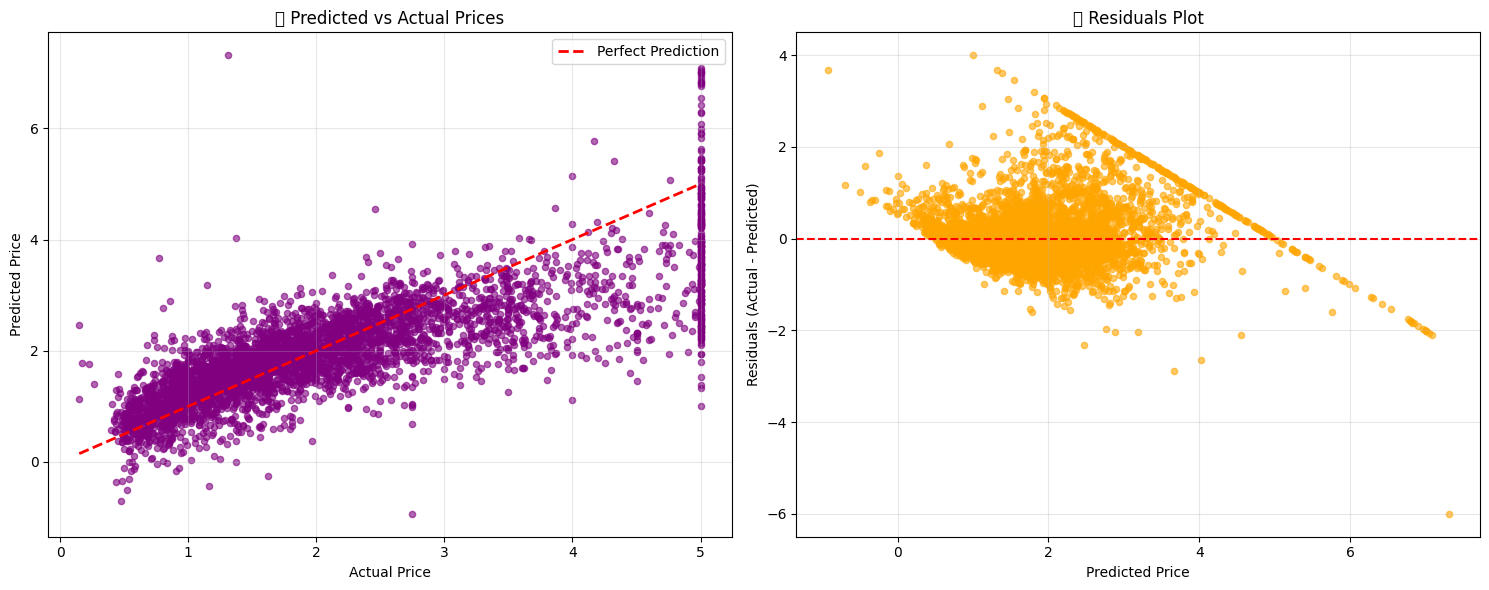

In [5]:
# Standardize features for better SVR performance
print("🔧 Preprocessing data with StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Support Vector Regressor
print(" Training Support Vector Regressor with linear kernel...")
sv_regressor = SVR(kernel='linear', C=1.0)
sv_regressor.fit(X_train_scaled, y_train)
print(" Training completed!")

# Make predictions
print(" Making predictions on test data...")
y_test_pred = sv_regressor.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"\n Regression Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Explained Variance Score: {evs:.4f}")

# Visualize predictions vs actual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot: Predicted vs Actual
ax1.scatter(y_test, y_test_pred, alpha=0.6, color='purple', s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title(' Predicted vs Actual Prices')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Residuals plot
residuals = y_test - y_test_pred
ax2.scatter(y_test_pred, residuals, alpha=0.6, color='orange', s=20)
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel('Predicted Price')
ax2.set_ylabel('Residuals (Actual - Predicted)')
ax2.set_title(' Residuals Plot')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


##  Step 5: Binary Classification Analysis


 Using threshold: $2.0 (hundreds of thousands)

 Confusion Matrix:
[[1991  399]
 [ 346 1392]]

 Classification Results:
Accuracy: 0.820
Actual labels - Class 0 (≤$2.0): 2390
Actual labels - Class 1 (>$2.0): 1738
Predicted labels - Class 0 (≤$2.0): 2337
Predicted labels - Class 1 (>$2.0): 1791


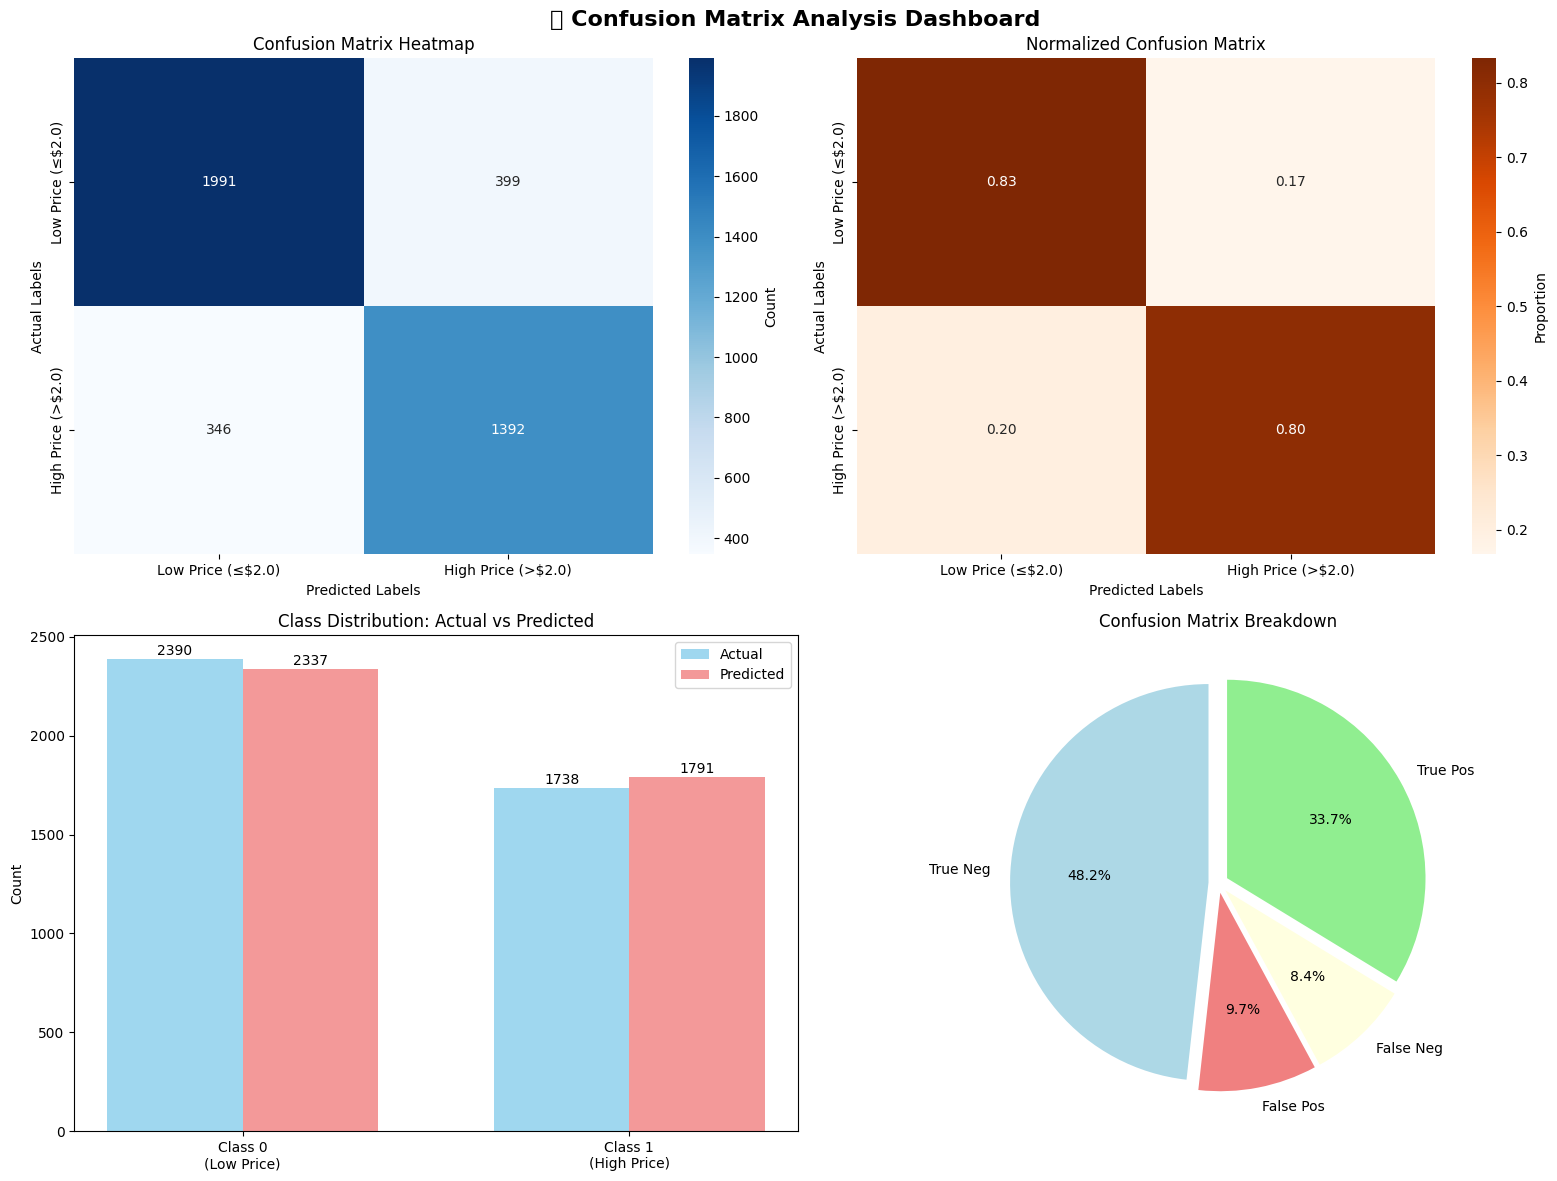


 DETAILED CLASSIFICATION REPORT
                    precision    recall  f1-score   support

 Low Price (≤$2.0)       0.85      0.83      0.84      2390
High Price (>$2.0)       0.78      0.80      0.79      1738

          accuracy                           0.82      4128
         macro avg       0.81      0.82      0.82      4128
      weighted avg       0.82      0.82      0.82      4128



In [6]:
# Binarize the predicted values & actual values using threshold
threshold = 2.0  # Threshold for California housing (in hundreds of thousands)
print(f" Using threshold: ${threshold} (hundreds of thousands)")

y_pred_label = (y_test_pred > threshold).astype(int)
y_test_label = (y_test > threshold).astype(int)

# Create confusion matrix
confusion_mat = confusion_matrix(y_test_label, y_pred_label)
print(f"\n Confusion Matrix:")
print(confusion_mat)

# Calculate classification metrics
tn, fp, fn, tp = confusion_mat.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"\n Classification Results:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Actual labels - Class 0 (≤${threshold}): {sum(y_test_label == 0)}")
print(f"Actual labels - Class 1 (>${threshold}): {sum(y_test_label == 1)}")
print(f"Predicted labels - Class 0 (≤${threshold}): {sum(y_pred_label == 0)}")
print(f"Predicted labels - Class 1 (>${threshold}): {sum(y_pred_label == 1)}")

# Enhanced confusion matrix visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Confusion Matrix Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Heatmap confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Price (≤$2.0)', 'High Price (>$2.0)'],
            yticklabels=['Low Price (≤$2.0)', 'High Price (>$2.0)'],
            ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix Heatmap')
ax1.set_ylabel('Actual Labels')
ax1.set_xlabel('Predicted Labels')

# 2. Normalized confusion matrix
confusion_mat_norm = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_mat_norm, annot=True, fmt='.2f', cmap='Oranges',
            xticklabels=['Low Price (≤$2.0)', 'High Price (>$2.0)'],
            yticklabels=['Low Price (≤$2.0)', 'High Price (>$2.0)'],
            ax=ax2, cbar_kws={'label': 'Proportion'})
ax2.set_title('Normalized Confusion Matrix')
ax2.set_ylabel('Actual Labels')
ax2.set_xlabel('Predicted Labels')

# 3. Class distribution comparison
categories = ['Class 0\n(Low Price)', 'Class 1\n(High Price)']
actual_counts = [sum(y_test_label == 0), sum(y_test_label == 1)]
predicted_counts = [sum(y_pred_label == 0), sum(y_pred_label == 1)]

x = np.arange(len(categories))
width = 0.35

bars1 = ax3.bar(x - width/2, actual_counts, width, label='Actual', color='skyblue', alpha=0.8)
bars2 = ax3.bar(x + width/2, predicted_counts, width, label='Predicted', color='lightcoral', alpha=0.8)

ax3.set_title('Class Distribution: Actual vs Predicted')
ax3.set_ylabel('Count')
ax3.set_xticks(x)
ax3.set_xticklabels(categories)
ax3.legend()

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

# 4. Confusion matrix breakdown pie chart
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
sizes = [tn, fp, fn, tp]
colors = ['lightblue', 'lightcoral', 'lightyellow', 'lightgreen']
explode = (0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = ax4.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                   startangle=90, explode=explode)
ax4.set_title('Confusion Matrix Breakdown')

plt.tight_layout()
plt.show()

# Print detailed classification report
print("\n DETAILED CLASSIFICATION REPORT")
print("=" * 45)
print(classification_report(y_test_label, y_pred_label, 
                          target_names=['Low Price (≤$2.0)', 'High Price (>$2.0)']))
